In [2]:
import os
import numpy as np
from sklearn.decomposition import PCA
from utils.visualisation import *
import sys
sys.path.append('../')
from helper.DataLoaderMNIST import DataLoader_MNIST
import torchvision.transforms as transforms
import torch
from resnet.model_def import ResNet

In [3]:
#reimpmort modules with autoreload
%load_ext autoreload
%autoreload 2

In [4]:
seed1 = 1
seed2 = 2
config = {
    "path_map":f'ResNet-LinearTransform/Linear_resnet_{seed1}_resnet_{seed2}_100.npy',
    "path_model1": f'../resnet/models/model_seed{seed1}.pth',
    "path_model2": f'../resnet/models/model_seed{seed2}.pth'}

In [5]:
#Load mapping
A = np.load(config["path_map"])
#Load models
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model1 = ResNet(pretrained=False).to(DEVICE)
model1.load_state_dict(torch.load(config['path_model1'],map_location = DEVICE))

model2 = ResNet(pretrained=False).to(DEVICE)# Load pretrained weights for model2
model2.load_state_dict(torch.load(config['path_model2'],map_location = DEVICE))

/home/hillary/miniconda3/envs/opti/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/hillary/miniconda3/envs/opti/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


<All keys matched successfully>

In [6]:
## Get dataloader to plot
# Transformations
transformations = [transforms.ToTensor(),
                    transforms.Lambda(lambda x: x.repeat(3, 1, 1)),
                    ]
# Load the data
batch_size=256
data_loader = DataLoader_MNIST(batch_size, transformations)

In [19]:
number_batches_to_plot=100
latent_space_model2,all_labels_model2 = get_latent_space_data(model2, data_loader, DEVICE,number_batches_to_plot)
latent_space_model1,all_labels_model1 = get_latent_space_data(model1, data_loader, DEVICE,number_batches_to_plot)

## Latent Space visualization with PCA

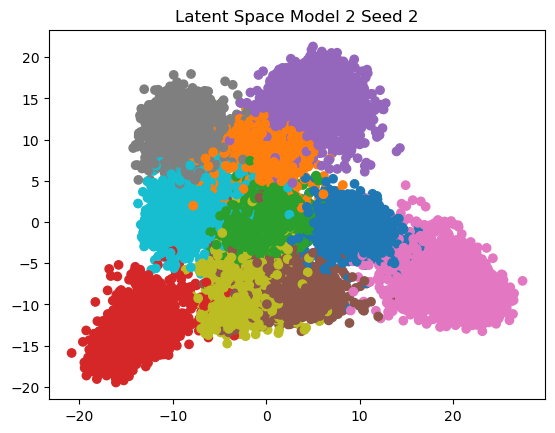

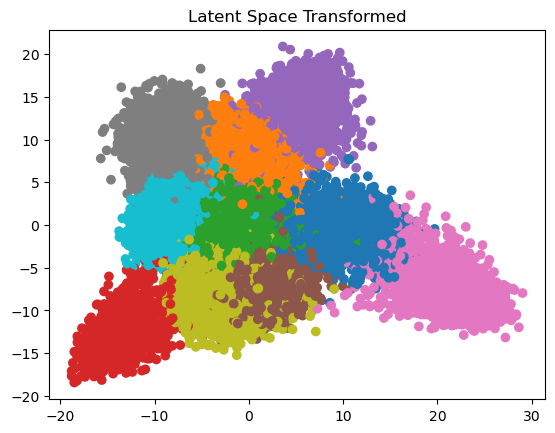

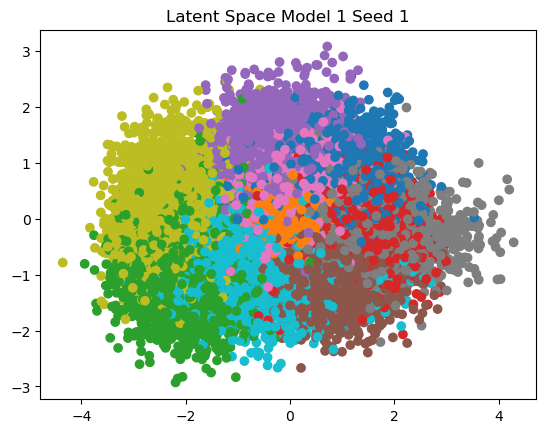

In [20]:
pca_model2 = pca_def(latent_space_model2)
plotLatentTransformed(latent_space_model2,all_labels_model2, np.eye(latent_space_model2.shape[1]), pca_model2, f"Model 2 Seed {seed2}")
plotLatentTransformed(latent_space_model1,all_labels_model1, A, pca_model2, "Transformed")
plotLatentTransformed(latent_space_model1,all_labels_model1, np.eye(latent_space_model1.shape[1]), pca_model2, f"Model 1 Seed {seed1}")

## Distances

In [21]:
print("Average distance transformed and model2: ", avg_transformed_distances(latent_space_model1, latent_space_model2, A))
print("Average distance model1 and model2: ", avg_transformed_distances(latent_space_model1, latent_space_model2, np.eye(latent_space_model1.shape[1])))

Average distance transformed and model2:  36.35689011792377
Average distance model1 and model2:  38.19030330984782
